Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pickle

# Data Collection & Analysis

PIMA Diabetes Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
# Loading the Diabetes Dataset into Pandas Dataframe 
data = pd.read_csv('diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   diabetes      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Printing First 5 Rows Of The Data
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Printing Last 5 Rows Of The Dataset
data.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# No. of Rows & Columns in the Dataset
data.shape

(768, 9)

In [ ]:
# Statistical Measures Of Dataset
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


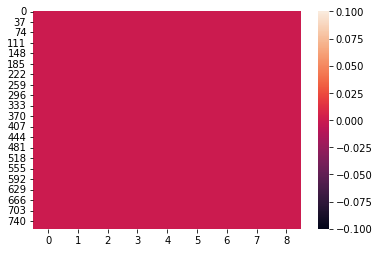

In [ ]:
# check if any null value is present
import seaborn as sns
c = sns.heatmap(data.isnull().values)


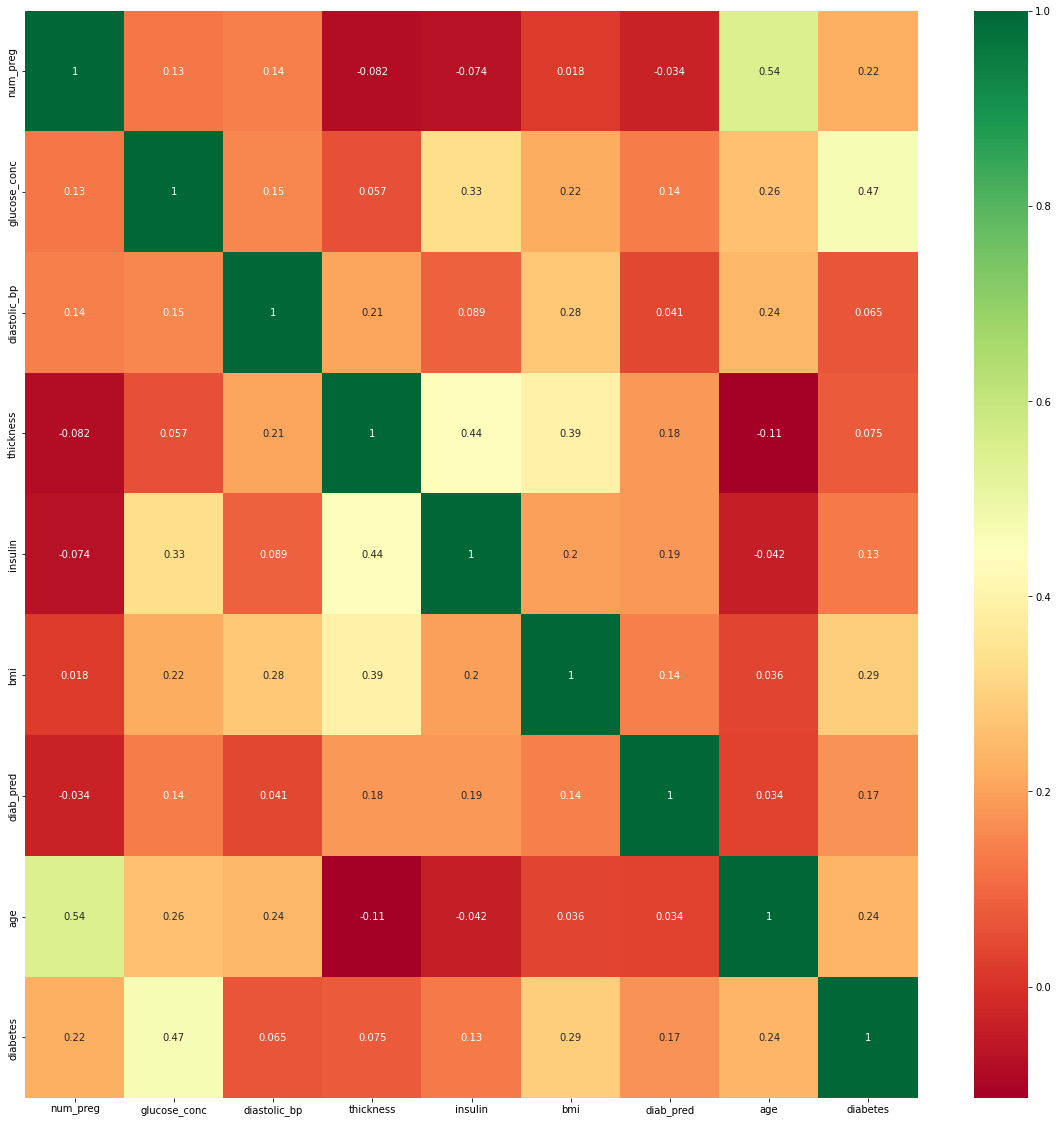

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Text(0, 0.5, 'No of People')

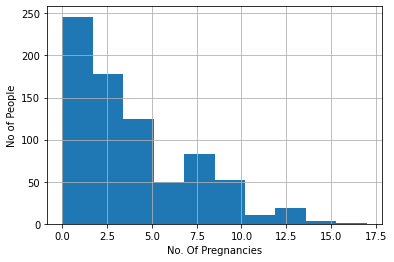

In [ ]:
data['num_preg'].hist()
plt.xlabel('No. Of Pregnancies')
plt.ylabel('No of People')

Text(0, 0.5, 'No of People')

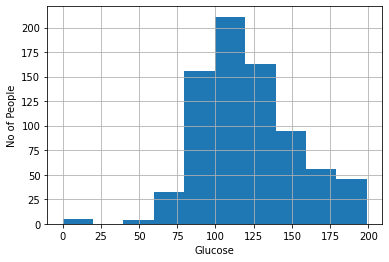

In [ ]:
data['glucose_conc'].hist()
plt.xlabel('Glucose')
plt.ylabel('No of People')

Text(0, 0.5, 'No of People')

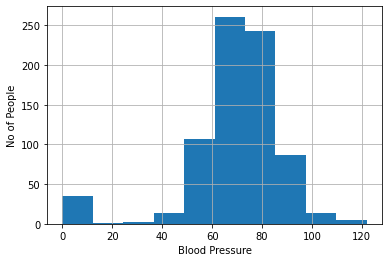

In [ ]:
data['diastolic_bp'].hist()
plt.xlabel('Blood Pressure')
plt.ylabel('No of People')

Text(0, 0.5, 'No of People')

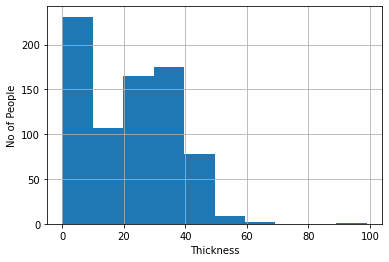

In [ ]:
data['thickness'].hist()
plt.xlabel('Thickness')
plt.ylabel('No of People')

Text(0, 0.5, 'No of People')

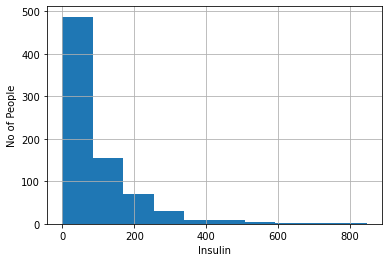

In [ ]:
data['insulin'].hist()
plt.xlabel('Insulin')
plt.ylabel('No of People')

Text(0, 0.5, 'No of People')

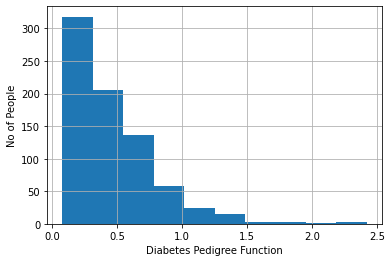

In [ ]:
data['diab_pred'].hist()
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('No of People')

Text(0, 0.5, 'No of People')

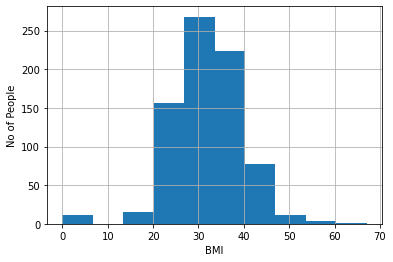

In [ ]:
data['bmi'].hist()
plt.xlabel('BMI')
plt.ylabel('No of People')

Text(0, 0.5, 'No of People')

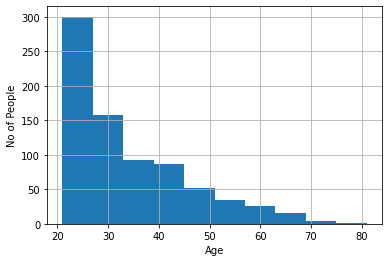

In [ ]:
data['age'].hist()
plt.xlabel('Age')
plt.ylabel('No of People')

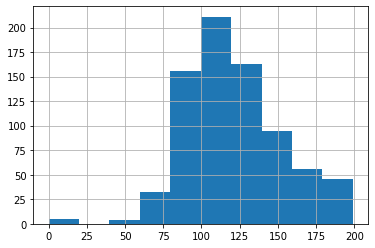

In [ ]:
data['glucose_conc'].hist()

In [ ]:
data.groupby('diabetes').mean()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age
diabetes,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
data['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

# Check how many other missing(zero) values

In [ ]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing thickness: {0}".format(len(data.loc[data['thickness'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))


total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing thickness: 227
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0


In [ ]:
data['insulin'] = data['insulin'].replace(0, data['insulin'].mean()) 
data['glucose_conc'] = data['glucose_conc'].replace(0, data['glucose_conc'].mean()) 
data['diastolic_bp'] = data['diastolic_bp'].replace(0, data['diastolic_bp'].mean()) 
data['bmi'] = data['bmi'].replace(0, data['bmi'].mean()) 
data['thickness'] = data['thickness'].replace(0, data['thickness'].mean()) 
print(data[:20])

    num_preg  glucose_conc  diastolic_bp  ...  diab_pred  age  diabetes
0          6         148.0     72.000000  ...      0.627   50         1
1          1          85.0     66.000000  ...      0.351   31         0
2          8         183.0     64.000000  ...      0.672   32         1
3          1          89.0     66.000000  ...      0.167   21         0
4          0         137.0     40.000000  ...      2.288   33         1
5          5         116.0     74.000000  ...      0.201   30         0
6          3          78.0     50.000000  ...      0.248   26         1
7         10         115.0     69.105469  ...      0.134   29         0
8          2         197.0     70.000000  ...      0.158   53         1
9          8         125.0     96.000000  ...      0.232   54         1
10         4         110.0     92.000000  ...      0.191   30         0
11        10         168.0     74.000000  ...      0.537   34         1
12        10         139.0     80.000000  ...      1.441   57   

# **Checking For the Outliers**

Text(0.5, 1.0, 'Thickness')

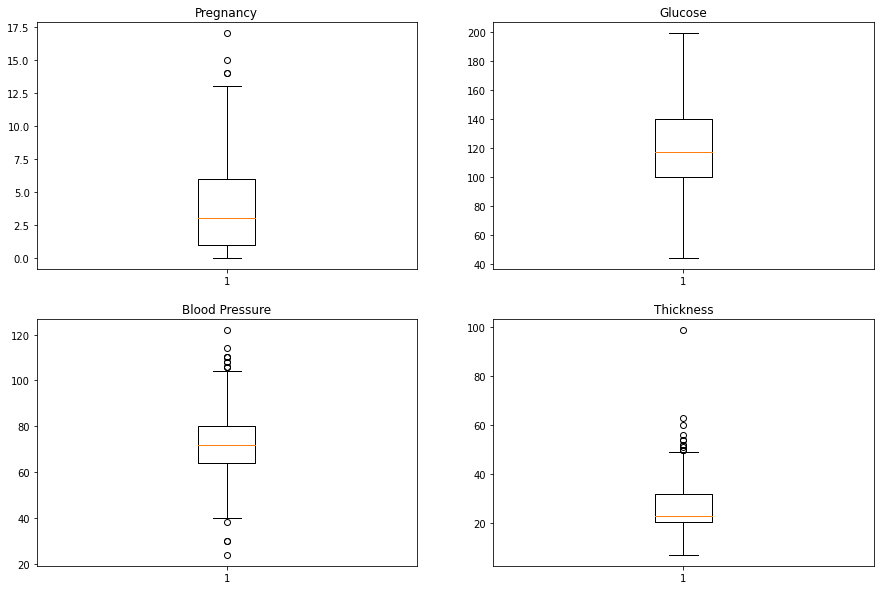

In [ ]:
plt.figure(figsize = (15,10))

ax = plt.subplot(221)
plt.boxplot(data['num_preg'])
ax.set_title('Pregnancy')

ax = plt.subplot(222)
plt.boxplot(data['glucose_conc'])
ax.set_title('Glucose')

ax = plt.subplot(223)
plt.boxplot(data['diastolic_bp'])
ax.set_title('Blood Pressure')

ax = plt.subplot(224)
plt.boxplot(data['thickness'])
ax.set_title('Thickness')


Text(0.5, 1.0, 'Age')

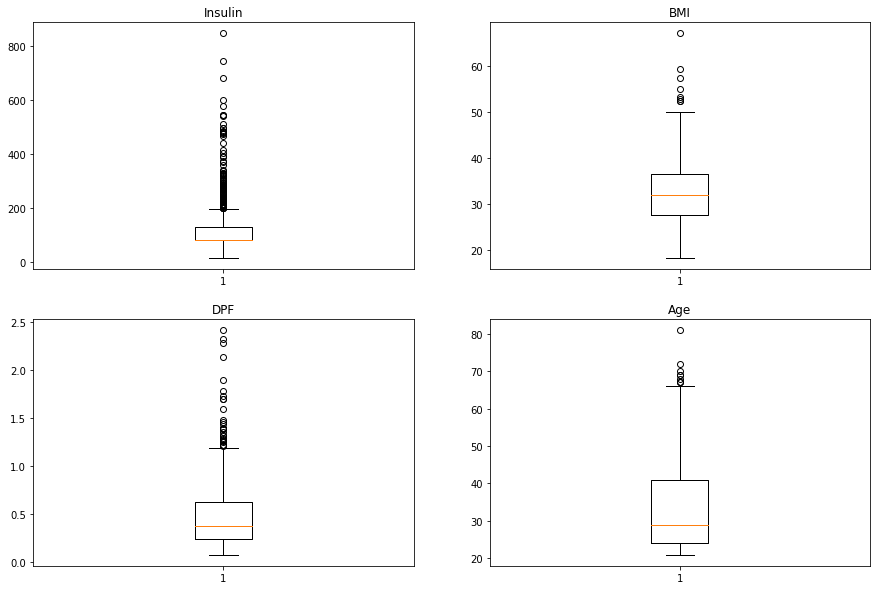

In [ ]:
plt.figure(figsize = (15,10))
ax = plt.subplot(221)
plt.boxplot(data['insulin'])
ax.set_title('Insulin')

ax = plt.subplot(222)
plt.boxplot(data['bmi'])
ax.set_title('BMI')

ax = plt.subplot(223)
plt.boxplot(data['diab_pred'])
ax.set_title('DPF')

ax = plt.subplot(224)
plt.boxplot(data['age'])
ax.set_title('Age')

**Removing Outliers for Insulin and DPF**

In [ ]:
# print('Mean of Insulin',data.insulin.mean())
# print('Std of Insulin: ',data.insulin.std())
# upperlimit = data.insulin.mean() + 3*data.insulin.std()
# print("Upper Limit is : ",upperlimit)
# lowerlimit = data.insulin.mean() - 3*data.insulin.std()
# print("Lower Limit is : ",lowerlimit)
min_thresold,max_thresold = data.insulin.quantile([0.010,0.940])
min_thresold,max_thresold

(24.340000000000003, 276.9599999999998)

In [ ]:
# data[(data.insulin>upperlimit) | (data.insulin<lowerlimit)]
data[data.insulin < min_thresold]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
52,5,88.000000,66.0,21.0,23.0,24.4,0.342,30,0
108,3,83.000000,58.0,31.0,18.0,34.3,0.336,25,0
182,1,120.894531,74.0,20.0,23.0,27.7,0.299,21,0
445,0,180.000000,78.0,63.0,14.0,59.4,2.420,25,1
566,1,99.000000,72.0,30.0,18.0,38.6,0.412,21,0
617,2,68.000000,62.0,13.0,15.0,20.1,0.257,23,0
711,5,126.000000,78.0,27.0,22.0,29.6,0.439,40,0
760,2,88.000000,58.0,26.0,16.0,28.4,0.766,22,0


In [ ]:
# data = data[(data.insulin<upperlimit) & (data.insulin>lowerlimit)]
data[data.insulin > max_thresold]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
53,8,176.0,90.0,34.0,300.0,33.7,0.467,58,1
54,7,150.0,66.0,42.0,342.0,34.7,0.718,42,0
56,7,187.0,68.0,39.0,304.0,37.7,0.254,41,1
111,8,155.0,62.0,26.0,495.0,34.0,0.543,46,1
139,5,105.0,72.0,29.0,325.0,36.9,0.159,28,0
144,4,154.0,62.0,31.0,284.0,32.8,0.237,23,0
153,1,153.0,82.0,42.0,485.0,40.6,0.687,23,0
162,0,114.0,80.0,34.0,285.0,44.2,0.167,27,0


In [ ]:
data = data[(data.insulin < max_thresold) & (data.insulin > min_thresold)]
data.shape

(713, 9)

In [ ]:
min_thresold1,max_thresold1 = data.diab_pred.quantile([0.001,0.940])
min_thresold1,max_thresold1

(0.082272, 1.02128)

In [ ]:
data[data.diab_pred < min_thresold1]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
268,0,102.0,52.0,20.536458,79.799479,25.1,0.078,21,0


In [ ]:
data[data.diab_pred > max_thresold1]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
4,0,137.0,40.0,35.000000,168.000000,43.100000,2.288,33,1
12,10,139.0,80.0,20.536458,79.799479,27.100000,1.441,57,0
39,4,111.0,72.0,47.000000,207.000000,37.100000,1.390,56,1
45,0,180.0,66.0,39.000000,79.799479,42.000000,1.893,25,1
58,0,146.0,82.0,20.536458,79.799479,40.500000,1.781,44,0
100,1,163.0,72.0,20.536458,79.799479,39.000000,1.222,33,1
131,9,122.0,56.0,20.536458,79.799479,33.300000,1.114,33,1
147,2,106.0,64.0,35.000000,119.000000,30.500000,1.400,34,0
152,9,156.0,86.0,28.000000,155.000000,34.300000,1.189,42,1
187,1,128.0,98.0,41.000000,58.000000,32.000000,1.321,33,1


In [ ]:
data = data[(data.diab_pred < max_thresold1) & (data.diab_pred > min_thresold1)]
data.shape

(669, 9)

In [ ]:
# separating the data and labels
X = data.drop(columns = ['diabetes'], axis=1)
Y = data['diabetes']


In [ ]:
print(X)

     num_preg  glucose_conc  diastolic_bp  ...   bmi  diab_pred  age
0           6         148.0          72.0  ...  33.6      0.627   50
1           1          85.0          66.0  ...  26.6      0.351   31
2           8         183.0          64.0  ...  23.3      0.672   32
3           1          89.0          66.0  ...  28.1      0.167   21
5           5         116.0          74.0  ...  25.6      0.201   30
..        ...           ...           ...  ...   ...        ...  ...
763        10         101.0          76.0  ...  32.9      0.171   63
764         2         122.0          70.0  ...  36.8      0.340   27
765         5         121.0          72.0  ...  26.2      0.245   30
766         1         126.0          60.0  ...  30.1      0.349   47
767         1          93.0          70.0  ...  30.4      0.315   23

[669 rows x 8 columns]


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 669, dtype: int64


**Data Standardization**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
X = standardized_data
Y = data['diabetes']

In [ ]:
print(X)
print(Y)

[[ 0.63535805  1.01089644 -0.02103723 ...  0.20850537  0.96845494
   1.44470617]
 [-0.84463685 -1.17634775 -0.51575123 ... -0.82042736 -0.26030787
  -0.17680907]
 [ 1.22735601  2.2260321  -0.6806559  ... -1.30549564  1.1687967
  -0.09146617]
 ...
 [ 0.33935907  0.07350607 -0.02103723 ... -0.87922351 -0.73222402
  -0.26215198]
 [-0.84463685  0.24709688 -1.01046523 ... -0.305961   -0.26921195
   1.18867745]
 [-0.84463685 -0.89860245 -0.18594189 ... -0.26186388 -0.42058128
  -0.85955234]]
0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 669, dtype: int64


In [ ]:
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
count,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000
mean,3.853513,118.882777,72.255144,26.167336,99.634105,32.181503,0.409469,33.071749,0.324365
std,3.380918,28.824920,12.137294,9.455191,45.231838,6.808256,0.224784,11.726203,0.468487
min,0.000000,44.000000,24.000000,7.000000,25.000000,18.200000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,79.799479,27.400000,0.236000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,22.000000,79.799479,32.000000,0.343000,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,106.000000,36.100000,0.561000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,274.000000,67.100000,1.021000,81.000000,1.000000


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify=Y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(669, 8) (602, 8) (67, 8)


**Training The Model**

# Support Vector Machine

In [ ]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    clf = SVC(kernel = kernels[i])
    clf.fit(X_train, Y_train)
    svc_scores.append(clf.score(X_test, Y_test))
    

In [ ]:
y_predict = clf.predict(X_test)
print(y_predict)

[0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1]


Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

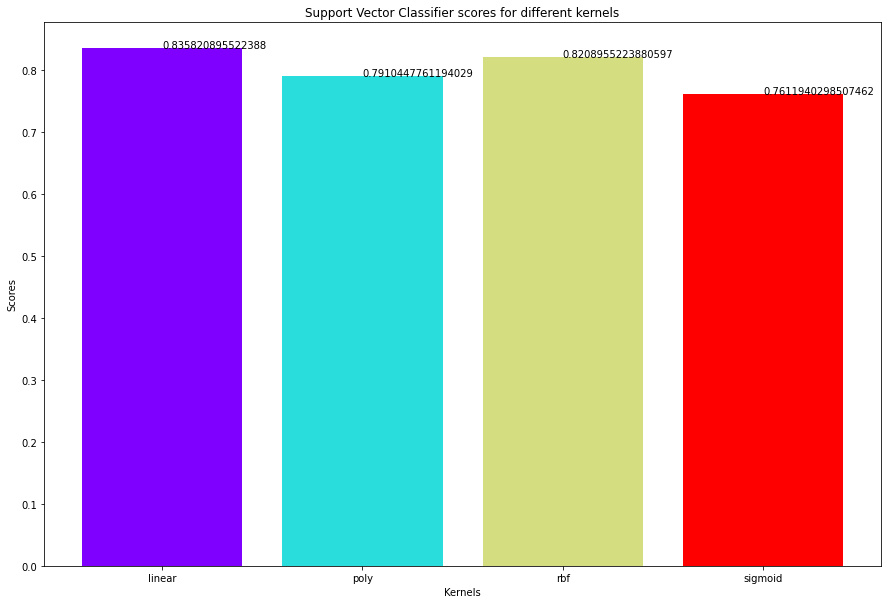

In [ ]:
plt.figure(figsize = (15,10))
from matplotlib.cm import rainbow
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

As can be seen from the plot above, the Linear Kernel performed the best for this dataset and achieved a score of 83.5%.

Normalized confusion matrix
[[0.93333333 0.06666667]
 [0.59090909 0.40909091]]


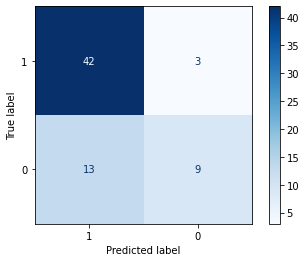

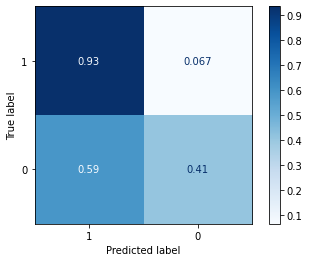

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = data.diabetes
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
  disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        Y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
print(title)
print(disp.confusion_matrix)

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        45
           1       0.75      0.41      0.53        22

    accuracy                           0.76        67
   macro avg       0.76      0.67      0.68        67
weighted avg       0.76      0.76      0.74        67



# K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, Y_train)
    knn_scores.append(knn_classifier.score(X_test, Y_test))
    ypredict = knn_classifier.predict(X_test)
print(knn_scores)


[0.7761194029850746, 0.7761194029850746, 0.7611940298507462, 0.7761194029850746, 0.8208955223880597, 0.7761194029850746, 0.7910447761194029, 0.7910447761194029, 0.7910447761194029, 0.8059701492537313, 0.7761194029850746, 0.7910447761194029, 0.7910447761194029, 0.7910447761194029, 0.8059701492537313, 0.7761194029850746, 0.7761194029850746, 0.7611940298507462, 0.7761194029850746, 0.7611940298507462]


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

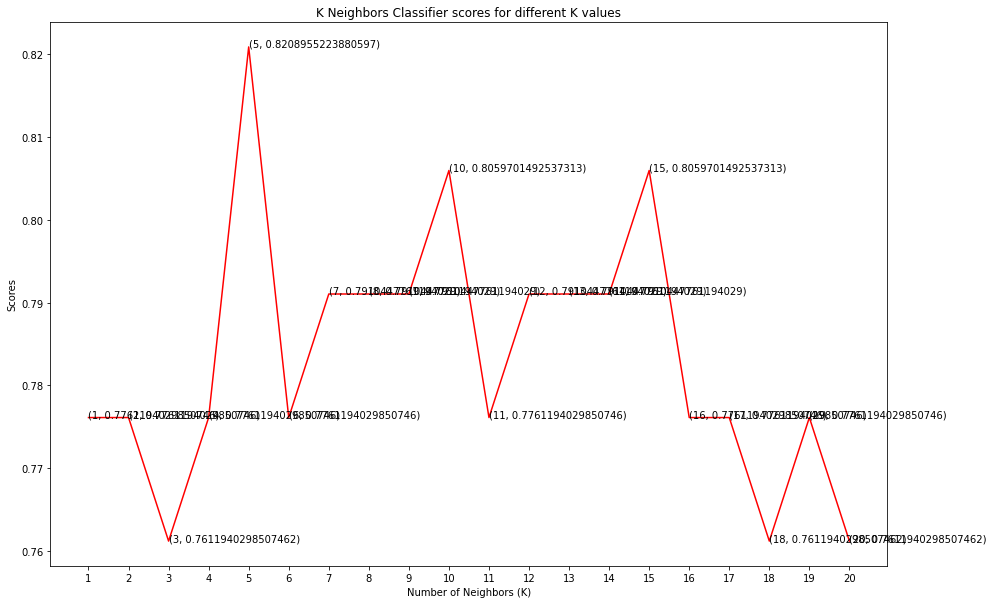

In [ ]:
plt.figure(figsize = (15,10))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


**We are getting accuracy of 82.08% when the value of K is 5**

Normalized confusion matrix
[[0.97777778 0.02222222]
 [0.68181818 0.31818182]]


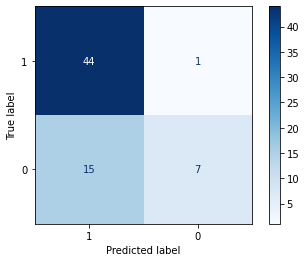

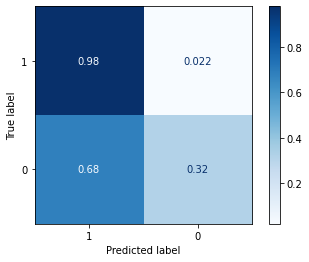

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = data.diabetes
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
  disp = ConfusionMatrixDisplay.from_estimator(
        knn_classifier,
        X_test,
        Y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
print(title)
print(disp.confusion_matrix)

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, ypredict))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        45
           1       0.88      0.32      0.47        22

    accuracy                           0.76        67
   macro avg       0.81      0.65      0.66        67
weighted avg       0.79      0.76      0.72        67



In [ ]:
# filename = 'TC127_Seminar_diabetes.pkl'
# pickle.dump(svc_classifier, open(filename, 'wb'))

In [ ]:
pickle.dump(clf, open("TC127_DiabetesPrediction.sav", "wb"))
pickle.dump(scaler, open("scaler1.sav", "wb"))